In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/rock_density_xray.csv')

In [3]:
df

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


In [7]:
df.columns =['Signal' , 'Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

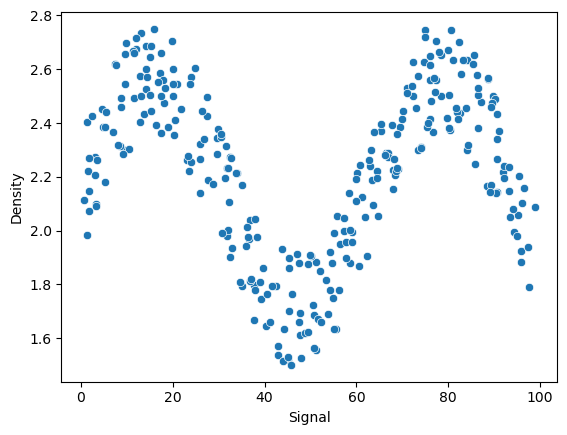

In [9]:
sns.scatterplot(data  =df ,x = 'Signal' , y = 'Density')

In [17]:
X = df['Signal'].values.reshape(-1,1)
y= df['Density']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.1,random_state= 101)

In [20]:
from sklearn.linear_model import LinearRegression


In [21]:
lrmodel = LinearRegression()

In [22]:
lrmodel.fit(X_train,y_train)

LinearRegression()

In [23]:
lrpred  = lrmodel.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [25]:
mean_absolute_error(lrpred,y_test)

0.211198973318633

In [26]:
mean_squared_error(lrpred , y_test)

0.0660516726514864

<AxesSubplot:xlabel='Signal', ylabel='Density'>

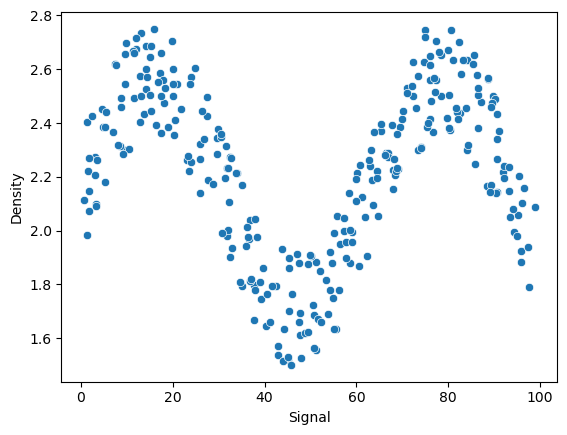

In [29]:
sns.scatterplot(x = 'Signal' , y='Density', data = df)


In [31]:

signal_r = np.arange(0,100)
signal_r = signal_r.reshape(-1,1)
signal_pred = lrmodel.predict(signal_r)

In [32]:
signal_pred

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

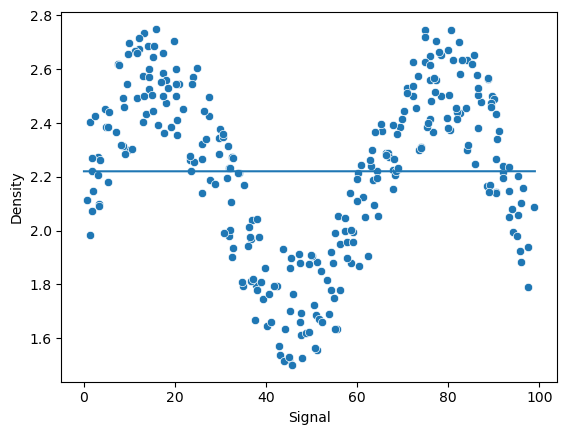

In [36]:
sns.scatterplot(x = 'Signal' , y='Density', data = df)
plt.plot(signal_r, signal_pred)

In [102]:
def run_model(model,X_train,X_test,y_train,y_test):
#     
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,pred))
    mae = mean_absolute_error(y_test,pred)
    print(f'RMSE : {rmse}')
    print(f'MAE : {mae}')
    
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(dpi  =100)
    sns.scatterplot(x = 'Signal' , y = 'Density' , data = df)
    plt.plot(signal_range,output)
    
# def run_model(model,X_train,y_train,X_test,y_test):
    
#     # Fit Model
#     model.fit(X_train,y_train)
#     preds = model.predict(X_test)
#     rmse = np.sqrt(mean_squared_error(y_test,preds))
#     print(f'RMSE : {rmse}')
#     signal_range = np.arange(0,100)
#     output = model.predict(signal_range.reshape(-1,1))
    
    
#     plt.figure(figsize=(12,6),dpi=150)
#     sns.scatterplot(x='Signal',y='Density',data=df,color='black')
#     plt.plot(signal_range,output)

In [103]:
model = LinearRegression()

In [104]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [105]:
pipe = make_pipeline(PolynomialFeatures(degree= 10),LinearRegression())

RMSE : 0.14034715212444523
MAE : 0.1246691689925818


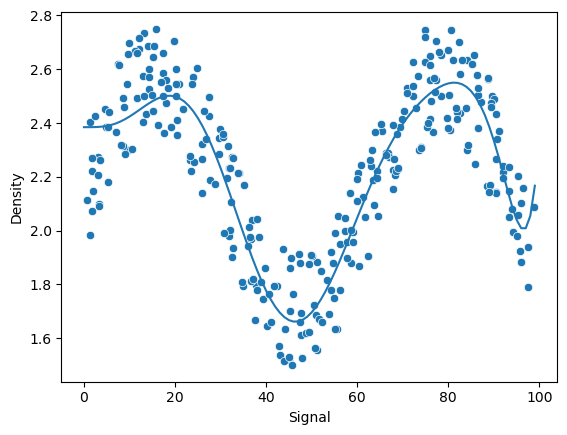

In [106]:
run_model(pipe,X_train,X_test,y_train,y_test)

In [107]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.1523487028635337
MAE : 0.11877297474442378
RMSE : 0.13730685016923647
MAE : 0.12198383614100558
RMSE : 0.13277855732740926
MAE : 0.11635971693292672
RMSE : 0.15954234753677107
MAE : 0.13363165935705318


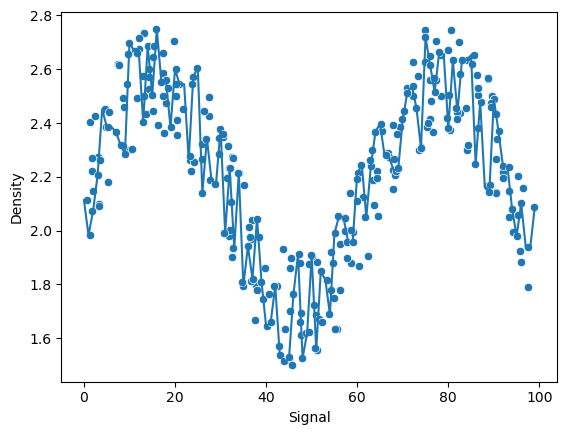

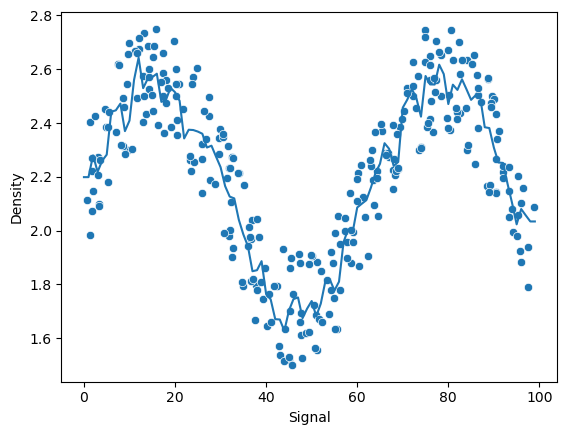

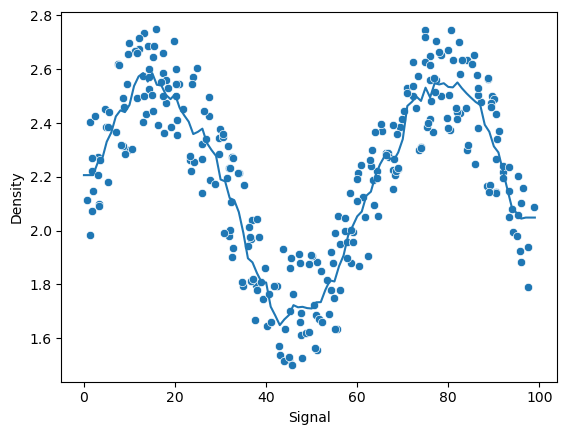

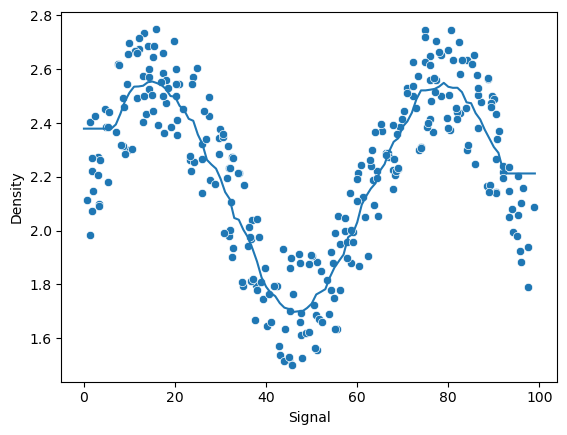

In [113]:
k_values = [1,5,10,30]
for n in k_values:
    model = KNeighborsRegressor(n_neighbors= n)
    run_model(model,X_train,X_test,y_train,y_test)

In [115]:
from sklearn.tree import DecisionTreeRegressor

In [116]:
model = DecisionTreeRegressor()

RMSE : 0.1523487028635337
MAE : 0.11877297474442378


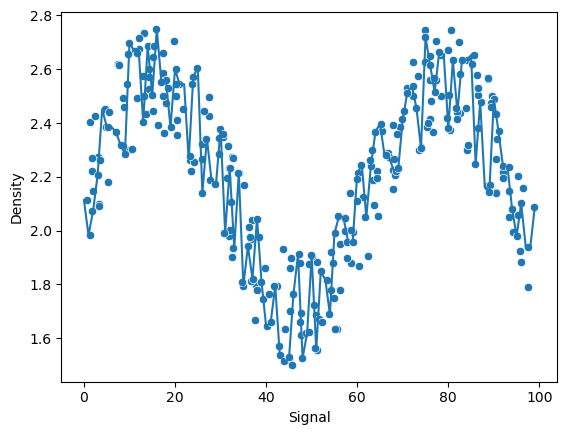

In [117]:
run_model(model,X_train,X_test,y_train,y_test)

In [118]:
from sklearn.svm import SVR

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
svr = SVR()

In [121]:
param_grid = {'C':[.01,.1,1,10,20,50,100,1000], 'gamma': ['auto', 'scale']}

In [122]:
grid = GridSearchCV(svr,param_grid)

RMSE : 0.12646999302046696
MAE : 0.10854210121348368


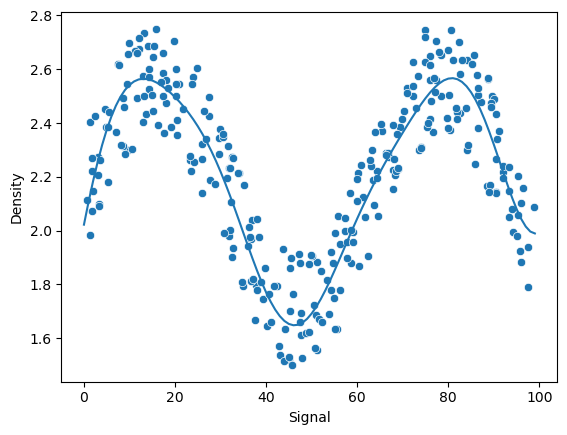

In [123]:
run_model(grid,X_train,X_test,y_train,y_test)

In [124]:
from sklearn.ensemble import RandomForestRegressor

In [125]:
rfr = RandomForestRegressor(n_estimators=10)

RMSE : 0.1476004350894289
MAE : 0.12651565147132246


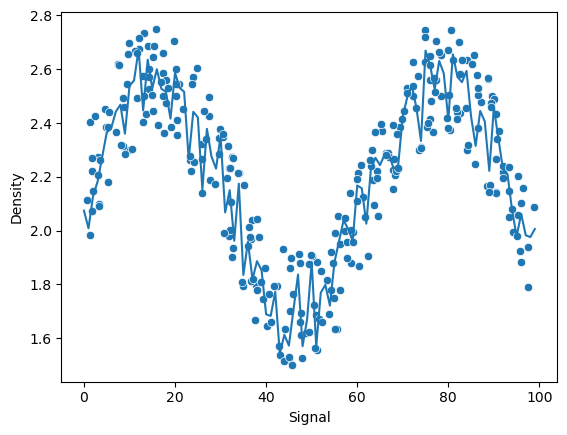

In [127]:
run_model(rfr,X_train,X_test,y_train,y_test)

In [128]:
from sklearn.ensemble import GradientBoostingRegressor ,AdaBoostRegressor

In [129]:
model= GradientBoostingRegressor()

RMSE : 0.13294148649584667
MAE : 0.11318284854800689


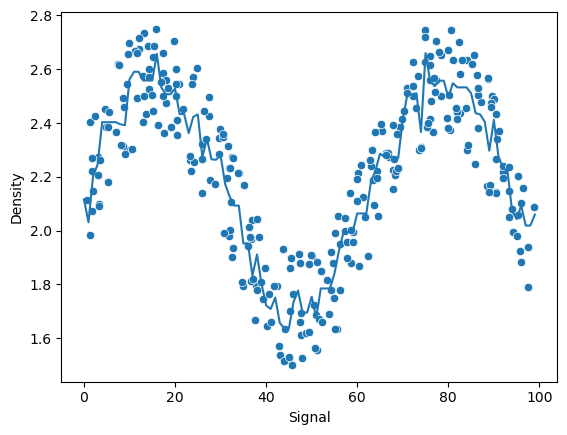

In [131]:
run_model(model,X_train,X_test,y_train,y_test)

RMSE : 0.13433170172304926
MAE : 0.11630070694242763


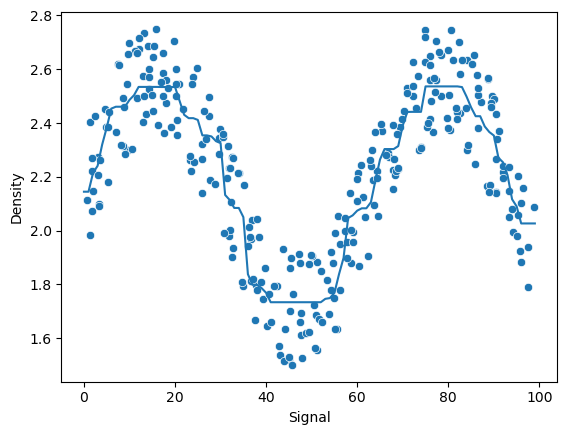

In [132]:
model= AdaBoostRegressor()
run_model(model,X_train,X_test,y_train,y_test)